## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9759516	total: 57.9ms	remaining: 57.9s
1:	learn: 0.9575807	total: 58.9ms	remaining: 29.4s
2:	learn: 0.9386428	total: 60ms	remaining: 19.9s
3:	learn: 0.9221364	total: 61ms	remaining: 15.2s
4:	learn: 0.9035286	total: 62ms	remaining: 12.3s
5:	learn: 0.8870842	total: 63ms	remaining: 10.4s
6:	learn: 0.8712316	total: 64ms	remaining: 9.08s
7:	learn: 0.8534283	total: 65ms	remaining: 8.06s
8:	learn: 0.8386805	total: 65.9ms	remaining: 7.26s
9:	learn: 0.8217993	total: 66.9ms	remaining: 6.62s
10:	learn: 0.8101678	total: 67.8ms	remaining: 6.09s
11:	learn: 0.7954646	total: 68.6ms	remaining: 5.65s
12:	learn: 0.7813236	total: 69.5ms	remaining: 5.27s
13:	learn: 0.7661838	total: 70.3ms	remaining: 4.95s
14:	learn: 0.7546347	total: 71.1ms	remaining: 4.67s
15:	learn: 0.7416746	total: 72ms	remaining: 4.43s
16:	learn: 0.7292519	total: 73ms	remaining: 4.22s
17:	learn: 0.7172560	total: 73.9ms	remaining: 4.03s
18:	learn: 0.7052335	total: 74.8ms	remaining: 3.86s
19:	lear

60:	learn: 0.4211939	total: 107ms	remaining: 1.64s
61:	learn: 0.4173246	total: 108ms	remaining: 1.63s
62:	learn: 0.4131067	total: 109ms	remaining: 1.61s
63:	learn: 0.4087220	total: 109ms	remaining: 1.6s
64:	learn: 0.4046039	total: 110ms	remaining: 1.58s
65:	learn: 0.4016063	total: 111ms	remaining: 1.57s
66:	learn: 0.3992799	total: 112ms	remaining: 1.56s
67:	learn: 0.3957885	total: 113ms	remaining: 1.54s
68:	learn: 0.3927424	total: 113ms	remaining: 1.53s
69:	learn: 0.3896071	total: 114ms	remaining: 1.52s
70:	learn: 0.3872362	total: 115ms	remaining: 1.51s
71:	learn: 0.3846888	total: 116ms	remaining: 1.5s
72:	learn: 0.3821869	total: 117ms	remaining: 1.48s
73:	learn: 0.3794791	total: 117ms	remaining: 1.47s
74:	learn: 0.3762849	total: 118ms	remaining: 1.46s
75:	learn: 0.3738062	total: 119ms	remaining: 1.45s
76:	learn: 0.3717293	total: 120ms	remaining: 1.44s
77:	learn: 0.3695718	total: 121ms	remaining: 1.43s
78:	learn: 0.3673674	total: 122ms	remaining: 1.42s
79:	learn: 0.3644632	total: 123ms

161:	learn: 0.2530376	total: 191ms	remaining: 990ms
162:	learn: 0.2524124	total: 192ms	remaining: 988ms
163:	learn: 0.2518184	total: 193ms	remaining: 985ms
164:	learn: 0.2511272	total: 194ms	remaining: 982ms
165:	learn: 0.2501423	total: 195ms	remaining: 979ms
166:	learn: 0.2493222	total: 196ms	remaining: 976ms
167:	learn: 0.2487212	total: 196ms	remaining: 973ms
168:	learn: 0.2478050	total: 197ms	remaining: 969ms
169:	learn: 0.2472376	total: 198ms	remaining: 967ms
170:	learn: 0.2461649	total: 199ms	remaining: 963ms
171:	learn: 0.2454911	total: 200ms	remaining: 961ms
172:	learn: 0.2447946	total: 200ms	remaining: 958ms
173:	learn: 0.2440566	total: 201ms	remaining: 955ms
174:	learn: 0.2432986	total: 202ms	remaining: 952ms
175:	learn: 0.2429086	total: 203ms	remaining: 949ms
176:	learn: 0.2422834	total: 204ms	remaining: 947ms
177:	learn: 0.2414006	total: 204ms	remaining: 944ms
178:	learn: 0.2406424	total: 205ms	remaining: 941ms
179:	learn: 0.2401107	total: 206ms	remaining: 939ms
180:	learn: 

282:	learn: 0.1843150	total: 297ms	remaining: 752ms
283:	learn: 0.1839777	total: 298ms	remaining: 751ms
284:	learn: 0.1834999	total: 299ms	remaining: 750ms
285:	learn: 0.1829956	total: 300ms	remaining: 748ms
286:	learn: 0.1825687	total: 301ms	remaining: 747ms
287:	learn: 0.1821679	total: 302ms	remaining: 746ms
288:	learn: 0.1818959	total: 303ms	remaining: 744ms
289:	learn: 0.1816770	total: 303ms	remaining: 743ms
290:	learn: 0.1814502	total: 304ms	remaining: 741ms
291:	learn: 0.1809473	total: 305ms	remaining: 739ms
292:	learn: 0.1804463	total: 306ms	remaining: 738ms
293:	learn: 0.1800055	total: 307ms	remaining: 736ms
294:	learn: 0.1794605	total: 307ms	remaining: 735ms
295:	learn: 0.1790881	total: 308ms	remaining: 734ms
296:	learn: 0.1786633	total: 309ms	remaining: 732ms
297:	learn: 0.1781970	total: 310ms	remaining: 730ms
298:	learn: 0.1777623	total: 311ms	remaining: 729ms
299:	learn: 0.1773385	total: 312ms	remaining: 727ms
300:	learn: 0.1770620	total: 313ms	remaining: 726ms
301:	learn: 

381:	learn: 0.1499803	total: 382ms	remaining: 618ms
382:	learn: 0.1495997	total: 383ms	remaining: 617ms
383:	learn: 0.1492953	total: 384ms	remaining: 616ms
384:	learn: 0.1491059	total: 385ms	remaining: 614ms
385:	learn: 0.1488760	total: 385ms	remaining: 613ms
386:	learn: 0.1486360	total: 386ms	remaining: 612ms
387:	learn: 0.1483804	total: 387ms	remaining: 611ms
388:	learn: 0.1481213	total: 388ms	remaining: 609ms
389:	learn: 0.1478714	total: 389ms	remaining: 608ms
390:	learn: 0.1474346	total: 390ms	remaining: 607ms
391:	learn: 0.1470978	total: 391ms	remaining: 606ms
392:	learn: 0.1470169	total: 392ms	remaining: 605ms
393:	learn: 0.1466586	total: 393ms	remaining: 604ms
394:	learn: 0.1462962	total: 393ms	remaining: 602ms
395:	learn: 0.1460203	total: 394ms	remaining: 601ms
396:	learn: 0.1458031	total: 395ms	remaining: 600ms
397:	learn: 0.1456340	total: 396ms	remaining: 599ms
398:	learn: 0.1451119	total: 397ms	remaining: 598ms
399:	learn: 0.1449314	total: 398ms	remaining: 596ms
400:	learn: 

507:	learn: 0.1215875	total: 487ms	remaining: 472ms
508:	learn: 0.1214211	total: 488ms	remaining: 471ms
509:	learn: 0.1213018	total: 489ms	remaining: 470ms
510:	learn: 0.1210514	total: 490ms	remaining: 469ms
511:	learn: 0.1207150	total: 491ms	remaining: 468ms
512:	learn: 0.1206440	total: 492ms	remaining: 467ms
513:	learn: 0.1204841	total: 492ms	remaining: 465ms
514:	learn: 0.1204159	total: 493ms	remaining: 464ms
515:	learn: 0.1202175	total: 494ms	remaining: 463ms
516:	learn: 0.1200853	total: 495ms	remaining: 463ms
517:	learn: 0.1197302	total: 496ms	remaining: 462ms
518:	learn: 0.1195095	total: 497ms	remaining: 461ms
519:	learn: 0.1193504	total: 498ms	remaining: 459ms
520:	learn: 0.1192127	total: 498ms	remaining: 458ms
521:	learn: 0.1191572	total: 499ms	remaining: 457ms
522:	learn: 0.1188799	total: 500ms	remaining: 456ms
523:	learn: 0.1186135	total: 501ms	remaining: 455ms
524:	learn: 0.1183289	total: 502ms	remaining: 454ms
525:	learn: 0.1181874	total: 503ms	remaining: 453ms
526:	learn: 

608:	learn: 0.1026131	total: 572ms	remaining: 368ms
609:	learn: 0.1024428	total: 573ms	remaining: 367ms
610:	learn: 0.1021811	total: 574ms	remaining: 366ms
611:	learn: 0.1019921	total: 575ms	remaining: 365ms
612:	learn: 0.1017564	total: 576ms	remaining: 364ms
613:	learn: 0.1016794	total: 577ms	remaining: 363ms
614:	learn: 0.1014229	total: 577ms	remaining: 362ms
615:	learn: 0.1011201	total: 578ms	remaining: 361ms
616:	learn: 0.1008602	total: 579ms	remaining: 360ms
617:	learn: 0.1008177	total: 580ms	remaining: 359ms
618:	learn: 0.1006223	total: 581ms	remaining: 358ms
619:	learn: 0.1004122	total: 582ms	remaining: 357ms
620:	learn: 0.1001333	total: 583ms	remaining: 356ms
621:	learn: 0.1000251	total: 584ms	remaining: 355ms
622:	learn: 0.0997630	total: 585ms	remaining: 354ms
623:	learn: 0.0995752	total: 585ms	remaining: 353ms
624:	learn: 0.0994663	total: 586ms	remaining: 352ms
625:	learn: 0.0993127	total: 587ms	remaining: 351ms
626:	learn: 0.0991988	total: 588ms	remaining: 350ms
627:	learn: 

734:	learn: 0.0833994	total: 678ms	remaining: 244ms
735:	learn: 0.0833322	total: 679ms	remaining: 243ms
736:	learn: 0.0831480	total: 679ms	remaining: 242ms
737:	learn: 0.0830636	total: 680ms	remaining: 242ms
738:	learn: 0.0830174	total: 681ms	remaining: 241ms
739:	learn: 0.0827966	total: 682ms	remaining: 240ms
740:	learn: 0.0826866	total: 683ms	remaining: 239ms
741:	learn: 0.0825019	total: 684ms	remaining: 238ms
742:	learn: 0.0824363	total: 685ms	remaining: 237ms
743:	learn: 0.0822756	total: 685ms	remaining: 236ms
744:	learn: 0.0820809	total: 686ms	remaining: 235ms
745:	learn: 0.0819375	total: 687ms	remaining: 234ms
746:	learn: 0.0818245	total: 688ms	remaining: 233ms
747:	learn: 0.0817532	total: 689ms	remaining: 232ms
748:	learn: 0.0815561	total: 690ms	remaining: 231ms
749:	learn: 0.0814387	total: 691ms	remaining: 230ms
750:	learn: 0.0813542	total: 692ms	remaining: 229ms
751:	learn: 0.0812943	total: 693ms	remaining: 228ms
752:	learn: 0.0811913	total: 694ms	remaining: 228ms
753:	learn: 

834:	learn: 0.0721856	total: 763ms	remaining: 151ms
835:	learn: 0.0720522	total: 764ms	remaining: 150ms
836:	learn: 0.0719615	total: 765ms	remaining: 149ms
837:	learn: 0.0718732	total: 766ms	remaining: 148ms
838:	learn: 0.0717450	total: 767ms	remaining: 147ms
839:	learn: 0.0715609	total: 768ms	remaining: 146ms
840:	learn: 0.0714464	total: 769ms	remaining: 145ms
841:	learn: 0.0713200	total: 769ms	remaining: 144ms
842:	learn: 0.0712301	total: 770ms	remaining: 143ms
843:	learn: 0.0711127	total: 771ms	remaining: 143ms
844:	learn: 0.0710256	total: 772ms	remaining: 142ms
845:	learn: 0.0709811	total: 773ms	remaining: 141ms
846:	learn: 0.0708452	total: 774ms	remaining: 140ms
847:	learn: 0.0706660	total: 775ms	remaining: 139ms
848:	learn: 0.0706074	total: 776ms	remaining: 138ms
849:	learn: 0.0704687	total: 777ms	remaining: 137ms
850:	learn: 0.0704329	total: 778ms	remaining: 136ms
851:	learn: 0.0703280	total: 779ms	remaining: 135ms
852:	learn: 0.0702650	total: 779ms	remaining: 134ms
853:	learn: 

959:	learn: 0.0600729	total: 870ms	remaining: 36.2ms
960:	learn: 0.0599502	total: 871ms	remaining: 35.3ms
961:	learn: 0.0598265	total: 871ms	remaining: 34.4ms
962:	learn: 0.0597687	total: 872ms	remaining: 33.5ms
963:	learn: 0.0596222	total: 873ms	remaining: 32.6ms
964:	learn: 0.0594944	total: 874ms	remaining: 31.7ms
965:	learn: 0.0594226	total: 875ms	remaining: 30.8ms
966:	learn: 0.0593342	total: 876ms	remaining: 29.9ms
967:	learn: 0.0592437	total: 877ms	remaining: 29ms
968:	learn: 0.0591812	total: 877ms	remaining: 28.1ms
969:	learn: 0.0590507	total: 878ms	remaining: 27.2ms
970:	learn: 0.0590142	total: 879ms	remaining: 26.3ms
971:	learn: 0.0588813	total: 880ms	remaining: 25.3ms
972:	learn: 0.0587476	total: 881ms	remaining: 24.4ms
973:	learn: 0.0586281	total: 882ms	remaining: 23.5ms
974:	learn: 0.0585280	total: 882ms	remaining: 22.6ms
975:	learn: 0.0583998	total: 883ms	remaining: 21.7ms
976:	learn: 0.0583683	total: 884ms	remaining: 20.8ms
977:	learn: 0.0582450	total: 885ms	remaining: 19

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

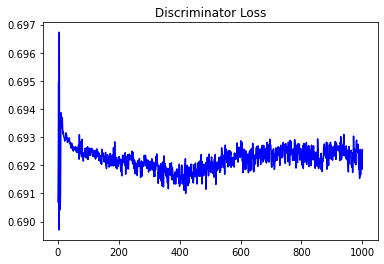

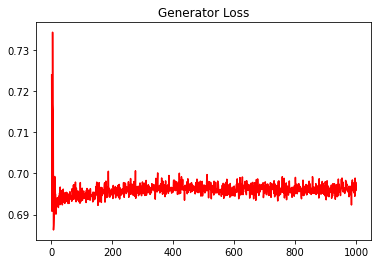

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10299461827498965


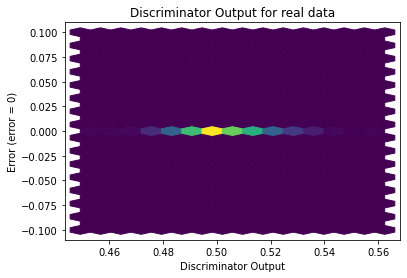

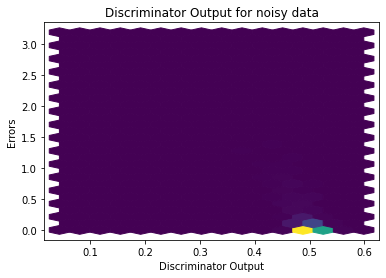

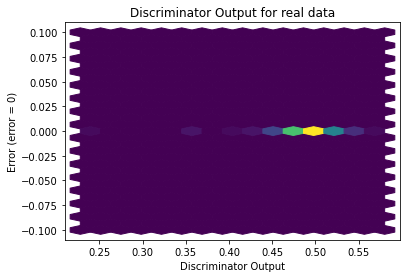

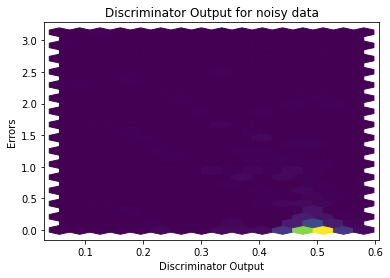

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


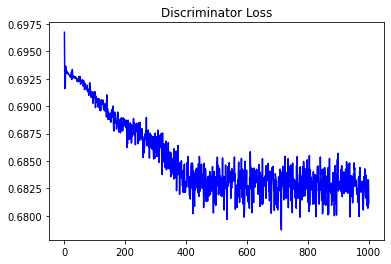

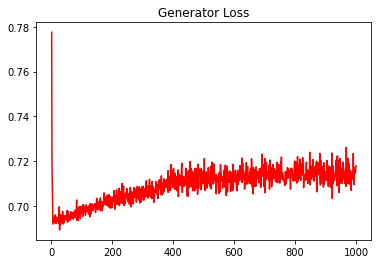

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07110266312617756


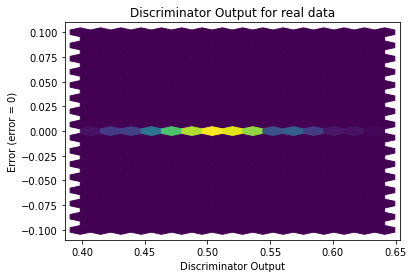

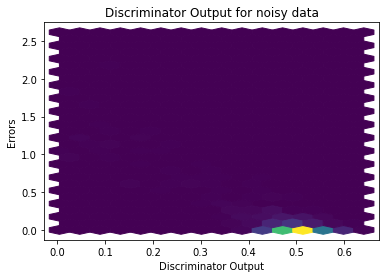

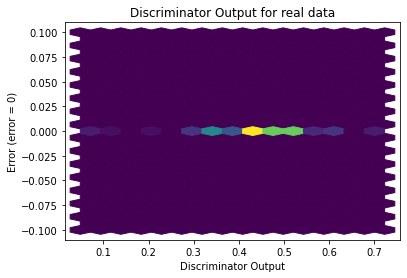

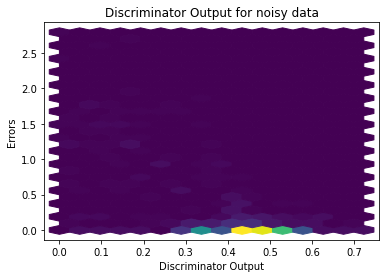

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4033]], requires_grad=True)
